In [ ]:
import pandas as pd 
import numpy as np  
import random
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [9]:
%store -r train_x
%store -r test_x
%store -r train_y
%store -r test_y

%store -r train_x_two_features
%store -r test_x_two_features
%store -r train_y_two_features
%store -r test_y_two_features

%store -r pca_train_x
%store -r pca_test_x

%store -r pca13_train_x
%store -r pca13_test_x

%store -r lda_train_x
%store -r lda_test_x

First approach:
We use KNeighborsClassifier to implement the k-nearest neighbors vote.

To find the optimal value of k, we will use a simple brute-force strategy. Namely, we will try many values of k and evaluate each, settling for the one with the best prediction results.

In [10]:
def run_k_nearest_neighbour(train_x, test_x, train_y, test_y):
    error_rate = []
    kvals = range(1,21)  # range of k parameters to test
    for i in kvals:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_x,train_y)
        pred_y_i = knn.predict(test_x)
        error_rate.append(np.mean(pred_y_i != test_y))
    plt.plot(kvals, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    kloc = error_rate.index(min(error_rate))
    print('Lowest error is %s occurs at k=%s.' % (error_rate[kloc], kvals[kloc]))
    clf = KNeighborsClassifier(kvals[kloc], 'uniform')
    clf.fit(train_x, train_y)
    
    scores = cross_val_score(clf, train_x, train_y, cv=5)
    print("In-sample accuracy for KNN: %.10f" % scores.mean())
    scores = cross_val_score(clf, test_x, test_y, cv=5) 
    print("Out-of-sample accuracy for KNN: %.10f" % scores.mean())

Second Approach:
We wrote our own method to implement the k-Nearest Neighbors algorithm from scratch.

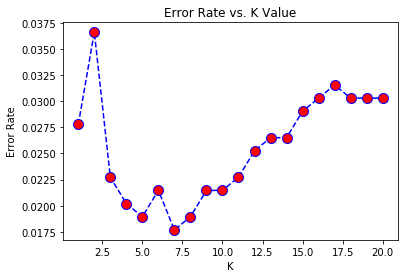

Lowest error is 0.017676767676767676 occurs at k=7.
In-sample accuracy for KNN: 0.9696947768
Out-of-sample accuracy for KNN: 0.9507602898


In [11]:
run_k_nearest_neighbour(train_x, test_x, train_y, test_y)

In [12]:
# Approach 2:
# We wrote our own method to implement the k-Nearest Neighbors algorithm from scratch.

import math
import operator
from scipy.stats import mode


# Euclidean distance calculation
# In order to make predictions we calculate the similarity between any two given data instances. 
# This is needed so that we can locate the k most similar data instances in the training dataset for a given member of the test dataset and in turn make a prediction.
def calculateDistance(instance1, instance2,length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]),2)
    return math.sqrt(distance)


# Below is the getNeighbors function that returns k most similar neighbors 
# from the training set for a given test instance (using the already defined euclideanDistance function)
def getNeighbors(train_data, train_labels, test_data_single, k):
    distances = []
    length = train_data.shape[1]
    for x in range(len(train_data)):
        dist = calculateDistance(test_data_single, train_data[x],length)
        distances.append((train_data[x],train_labels[x],dist))
    distances.sort(key=operator.itemgetter(2))  #sort based on 3rd item which is distance
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][1])  #return top k nearest data's label
    return neighbors


# The funuction below is used for getting the majority voted response from a number of neighbors.
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
    

In [13]:
def run_my_k_nearest_neighbour(train_x, test_x, train_y, test_y):
    accuracy = []
    print("")
    print("Use self-written KNeighbors Classifier:")
    for K in range(1,20):
        results = []
        for i in range(len(test_x)):
            test_single = test_x[i]
            neighbor = getNeighbors(train_x, train_y, test_single, K)
            res = getResponse(neighbor)
            results.append(res)
        # We evaluate the accuracy of the model by calculating a ratio of the total correct predictions out of all predictions made (the classification accuracy)
        correct = 0
        wrong = 0
        for j in range(len(test_y)):
            if(results[j] == test_y[j]):
                correct += 1
            else:
                wrong += 1
        accuracy.append(float(correct)/(correct+wrong))
        print('Correct rate is %s when K = %s.'  % (float(correct)/(correct+wrong),K))
    print('Highest correct rate %s occurs at K = %s.' % (max(accuracy), accuracy.index(max(accuracy))+1))

In [14]:
run_my_k_nearest_neighbour(train_x, test_x, train_y, test_y)


Use self-written KNeighbors Classifier:
Correct rate is 0.9722222222222222 when K = 1.
Correct rate is 0.9722222222222222 when K = 2.
Correct rate is 0.9772727272727273 when K = 3.
Correct rate is 0.9810606060606061 when K = 4.
Correct rate is 0.9810606060606061 when K = 5.
Correct rate is 0.9823232323232324 when K = 6.
Correct rate is 0.9823232323232324 when K = 7.
Correct rate is 0.9823232323232324 when K = 8.
Correct rate is 0.9785353535353535 when K = 9.
Correct rate is 0.9823232323232324 when K = 10.
Correct rate is 0.9772727272727273 when K = 11.
Correct rate is 0.9797979797979798 when K = 12.
Correct rate is 0.9734848484848485 when K = 13.
Correct rate is 0.976010101010101 when K = 14.
Correct rate is 0.9709595959595959 when K = 15.
Correct rate is 0.9709595959595959 when K = 16.
Correct rate is 0.9684343434343434 when K = 17.
Correct rate is 0.9696969696969697 when K = 18.
Correct rate is 0.9696969696969697 when K = 19.
Highest correct rate 0.9823232323232324 occurs at K = 6.


In [15]:
run_my_k_nearest_neighbour(train_x_two_features, test_x_two_features, train_y_two_features, test_y_two_features)
run_my_k_nearest_neighbour(pca13_train_x, pca13_test_x, train_y, test_y)


Use self-written KNeighbors Classifier:
Correct rate is 0.952020202020202 when K = 1.
Correct rate is 0.952020202020202 when K = 2.
Correct rate is 0.9696969696969697 when K = 3.
Correct rate is 0.9671717171717171 when K = 4.
Correct rate is 0.9734848484848485 when K = 5.
Correct rate is 0.9734848484848485 when K = 6.
Correct rate is 0.9709595959595959 when K = 7.
Correct rate is 0.9722222222222222 when K = 8.
Correct rate is 0.9772727272727273 when K = 9.
Correct rate is 0.9734848484848485 when K = 10.
Correct rate is 0.976010101010101 when K = 11.
Correct rate is 0.9747474747474747 when K = 12.
Correct rate is 0.9747474747474747 when K = 13.
Correct rate is 0.976010101010101 when K = 14.
Correct rate is 0.976010101010101 when K = 15.
Correct rate is 0.9772727272727273 when K = 16.
Correct rate is 0.9772727272727273 when K = 17.
Correct rate is 0.9785353535353535 when K = 18.
Correct rate is 0.9785353535353535 when K = 19.
Highest correct rate 0.9785353535353535 occurs at K = 18.

Us